# Alessandro Pomponio - 0000920265

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from plot_silhouette import plot_silhouette

# Variables
file_name = 'lab_exercise.csv'
separator = ','
random_state = 42

# Directives
%matplotlib inline
np.random.seed(random_state)


1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)
2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if
any (2pt)
3. a clustering schema using a method of your choice exploring a range of parameter
values (5pt)
4. the plot of the global inertia (SSD) and silhouette index for the parameter values you
examine (4pt)
5. the optimal parameters of your choice (4pt)
6. a pairplot of the data using as hue the cluster assignment with the optimal parameter
(3pt)
7. a plot of the silhouette index for the data points, grouped according to the clusters
(4pt)
8. A sorted list of the discovered clusters for decreasing sizes (7pt)

## 1. the boxplots of the attributes and a comment on remarkable situations, if any (2pt)

In [2]:
# Read the file
X = pd.read_csv(file_name, delimiter = separator, header = None)

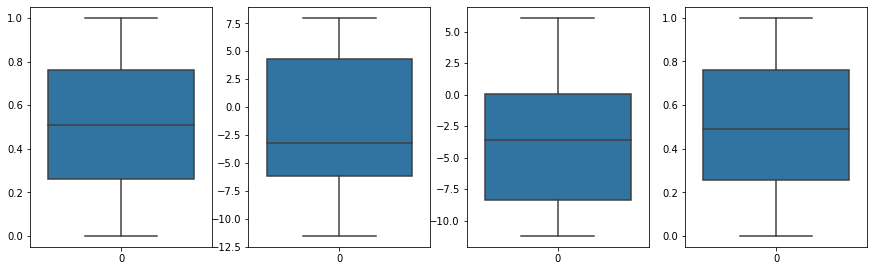

In [3]:
# Produce the boxplots
plt.figure(figsize=(15,15))
pos = 1

for i in X.columns:
    plt.subplot(3, 4, pos) # It looks bad otherwise
    sns.boxplot(X[i])
    pos += 1


The boxplots show that there are no outliers, the distribution of 0 and 3 is very similar. 1 and 2 have a similar median value but different distribution of values. There doesn't seem to be any particular situation showing.

## 2. a pairplot of the data (see Seaborn pairplot) and a comment on remarkable situations, if any (2pt)

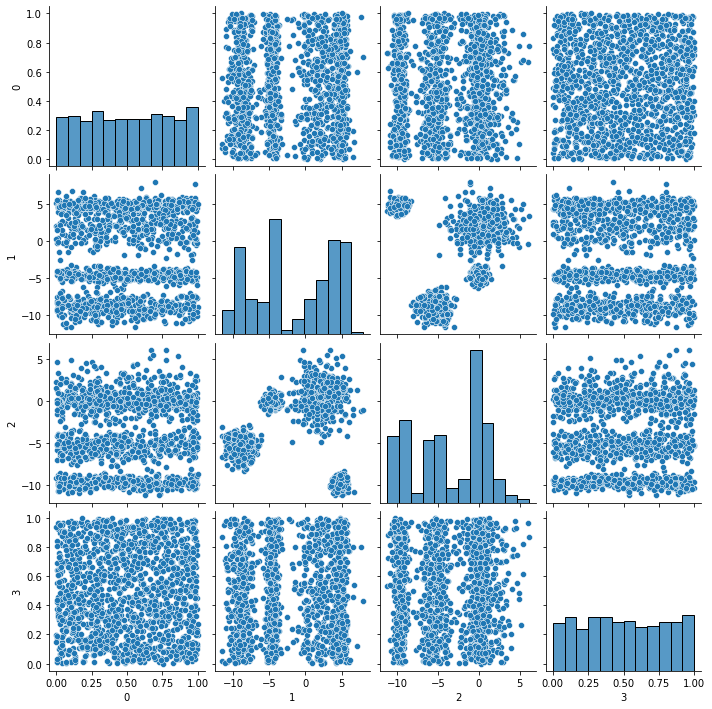

In [4]:
sns.pairplot(X)

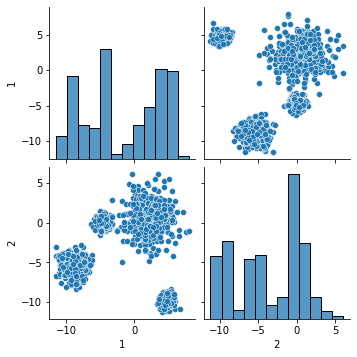

In [5]:
#come selezionare colonne
pippo = X[[1,2]]
pippo
sns.pairplot(pippo)

From the pairplot it is clear that the columns 1 and 2 tend to form quite distinct clusters. They're probably our best bet for our clustering efforts.

## 3. a clustering schema using a method of your choice exploring a range of parameter values (5pt)

In order to find a clustering scheme, we will use K-means with the elbow method, ranging from 2 to 10 clusters

In [6]:
k_range = range(2,11)

# Distortion and Silhouette Score as measures
distortions = []
silhouette_scores = []

for i in k_range:
    
    km = KMeans(n_clusters = i, 
                init = 'k-means++', 
                n_init = 10, 
                max_iter = 300, 
                random_state = random_state)

    y_km = km.fit_predict(X)
    
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X,y_km))

In [7]:
#messo da marco lorenzo per provare
from sklearn.model_selection import ParameterGrid
import warnings
warnings.filterwarnings("ignore")

distorsion_km = []
silhouette_scores_km = []

k_range = list(range(2,11)) # set the range of k values to test 
parameters_km = [{'n_clusters': k_range}]
pg = list(ParameterGrid(parameters_km))

for i in range(len(pg)):
    km = KMeans(**(pg[i]), random_state=random_state)

    y_km = km.fit_predict(X)
    
    distorsion_km.append(km.inertia_)
    silhouette_scores_km.append(silhouette_score(X,y_km))

## 4. the plot of the global inertia (SSD) and silhouette index for the parameter values you examine (4pt)

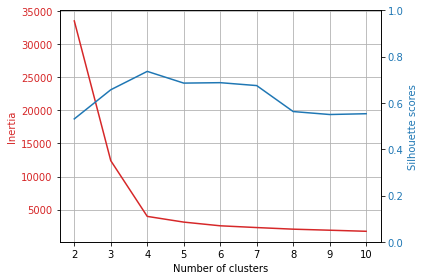

In [17]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
plt.grid()
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)  # we already handled the x-label with ax1
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1) # the axis for silhouette is [0,1]

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 5. the optimal parameters of your choice (4pt)

Both the silhouette scores and the inertia elbow suggest that the best number of clusters is 4, which is in line with what we were expecting, given the initial pairplots

In [9]:
best_k = 4

## 6. a pairplot of the data using as hue the cluster assignment with the optimal parameter (3pt)

In [10]:
# Create a new Kmeans classifier with the best parameter we found
km = KMeans(n_clusters = 4, 
                init = 'k-means++', 
                n_init = 10, 
                max_iter = 300, 
                random_state = random_state)

# Predict the cluster labels
y_km = km.fit_predict(X)

In order to use the predicted labels as hue we will add it to a new dataframe using the `assign` method

In [11]:
X_pred = X.assign(pred_class = y_km)
X_pred

#alternativa nostra assign
#X_pred2 = X.copy()
#X_pred2["pred_class"] = y_km

,0,1,2,3,pred_class
0,0.548814,-4.893751,0.365316,0.715189,2
1,0.602763,-0.387057,1.164867,0.544883,0
2,0.423655,-10.844898,-7.553523,0.645894,1
3,0.437587,1.975564,-1.274422,0.891773,0
4,0.963663,-4.054276,0.064053,0.383442,2
...,...,...,...,...,...
1495,0.082494,-8.527192,-6.726876,0.475214,1
1496,0.287293,2.993118,2.229159,0.879682,0
1497,0.284927,4.538220,-10.364241,0.941687,3
1498,0.546133,3.680623,-9.554374,0.323614,3


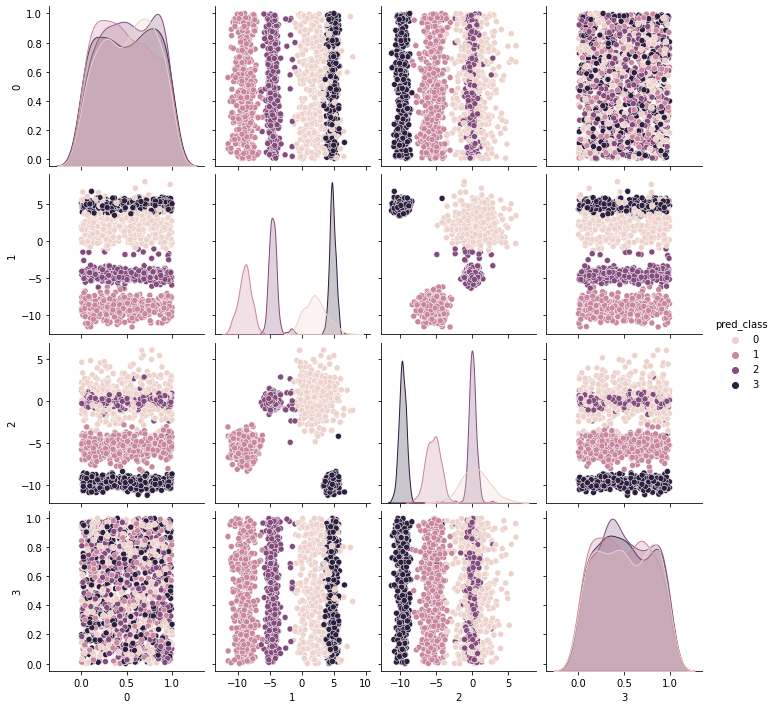

In [12]:
sns.pairplot(X_pred, hue = 'pred_class')

## 7. a plot of the silhouette index for the data points, grouped according to the clusters (4pt)

In order to perform this task, we will use the `plot_silhouette` function that was introduced in the exercises in class

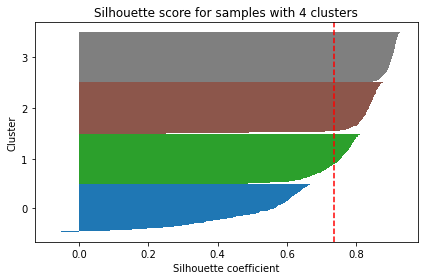

In [13]:
# Compute the Silhouette Coefficient for each sample, with the euclidean metric
silhouette_score_samples = silhouette_samples(X, y_km, metric='euclidean')
plt.title(f"Silhouette score for samples with {best_k} clusters")
plot_silhouette(silhouette_score_samples, y_km)

## 7. A sorted list of the discovered clusters for decreasing sizes (7pt)

To make this task easier, we leverage numpy's function `bincount`

In [14]:
occurrences = np.bincount(y_km)
occurrences

#Alternativa nostra
occurrences2 = np.unique(y_km, return_counts=True)
sorted_clusters = [x for _, x in sorted(zip(occurrences2[1], occurrences2[0]), reverse=True)]       #riordina in base al [0], ma prende solo i valori di [1]
sorted_clusters

[2, 3, 1, 0]

`bincount` created an array that contains as index the cluster numbers, as value, the elements in that cluster. We can then create tuples to have this association in an explicit way

In [15]:
item_cluster_tuples = [(qty, idx) for idx, qty in enumerate(occurrences)]
item_cluster_tuples

[(359, 0), (375, 1), (390, 2), (376, 3)]

We can now sort the tuples and extract the cluster index to obtain what was requested

In [16]:
sorted_clusters = [i[1] for i in sorted(item_cluster_tuples, reverse = True)]
sorted_clusters

[2, 3, 1, 0]